# Map Reduce with Spark - Individual Assignment.

### The code below uses map reduce in spark in order to provide a word count. Your task is to copy and modify the code in order to generate a similar analysis on a book of your choice.

 * Start by picking a book and finding its txt file https://www.gutenberg.org/
 * Ensure the starter code works. This starter code finds and lists the _most frequent single words_ that appear in the book.
 * Create three different map reduce operations that:
 * (1) One task that finds and lists the _longest single words_ used in the book. For example, the word "three" would have a length of "5".
 * (2) Another task that finds and lists the _most frequent bigrams_. A bigram is a pair of words that appear next to each other. For example, the phrase "one two three four" will have the bigrams "one two" "two three" and "three four".
 * (3) Another task that finds and lists a _customized statistic_. Pick any other kind of text counting statistic that you want to use map reduce for. Explain it and then implement it in this notebook.

In [1]:
from pyspark import SparkContext
import pandas as pd

# Create a SparkContext
sc = SparkContext("local", "WordCount")

# Read the text file
text_file = sc.textFile("the-whale.txt")


def split_line(line):
    return line.split(" ")

def map_word_to_one(word):
    return (word, 1)

def add_counts(a, b):
    return a + b

# Split each line into words, map each word to a (word, 1) pair, and reduce by key to count occurrences
word_counts = text_file.flatMap(split_line) \
                       .map(map_word_to_one) \
                       .reduceByKey(add_counts)

word_counts_sorted = word_counts.sortBy(lambda x: x[1], ascending=False)

# Collect the top N words and their counts
top_n = 50  # Adjust this to your desired limit
top_n_words = word_counts_sorted.take(top_n)

# Create a list of tuples (word, count) for the top N words
top_n_word_counts = [(word, count) for word, count in top_n_words]

# Create a Pandas DataFrame from the list of tuples
top_n_df = pd.DataFrame(top_n_word_counts, columns=['word', 'count'])

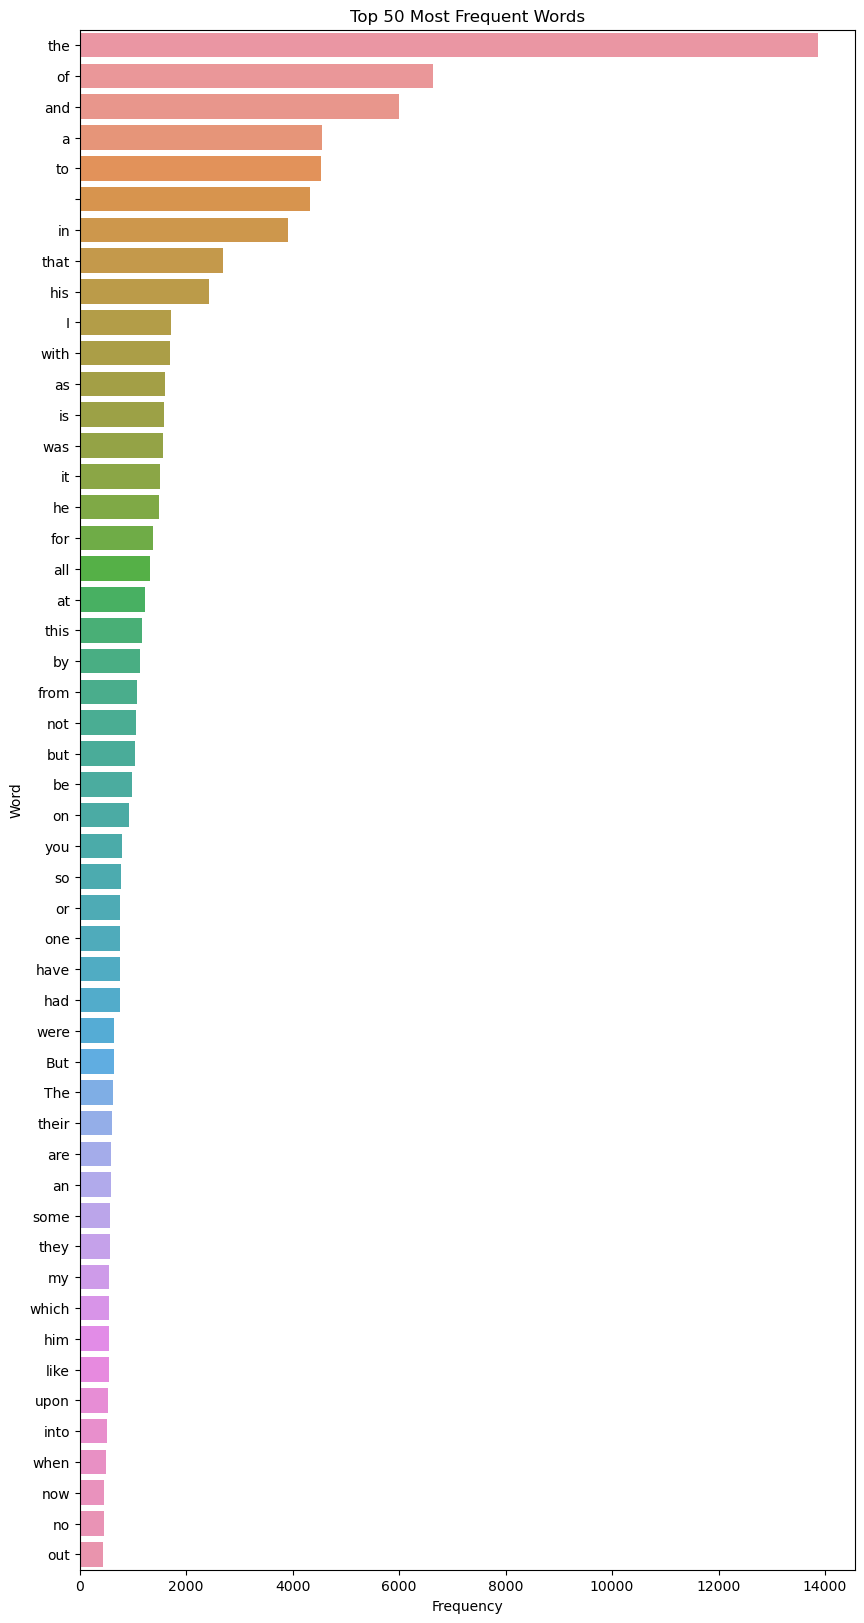

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
# Create a bar plot using seaborn
plt.figure(figsize=(10, 20))  # Adjust width and height as needed
sns.barplot(x='count', y='word', data=top_n_df, orient='h')
plt.title(f'Top {top_n} Most Frequent Words')
plt.xlabel('Frequency')
plt.ylabel('Word')
plt.show()

## Task 1: Longest Single Words 

## Task 2: Most Frequent Bigrams

## Task 3: Customized Statistic